This is Ramkishore Rao's Project - Application of Tensor Flow and Keras for Loan Dataset

In [ ]:
import tensorflow.keras
from tensorflow . keras .models import Sequential
from tensorflow . keras . layers import Dense , Activation
from tensorflow . keras . callbacks import EarlyStopping
from sklearn . model_selection import train_test_split

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
import sklearn
from sklearn.model_selection import train_test_split
import io
import requests
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold



In [ ]:
!pip install theano

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 6.6 MB/s 
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=e4aa5511df570b341a9762898386f04f8b32a624c444588cc4bd6a4405d9005c
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5723a0a5e322cc144
Successfully built theano


In [47]:
df = pd.read_csv('/content/initialmodel2.csv', on_bad_lines="skip", engine="python")


In [48]:
df.head()
len(df)

209011

In [49]:
df1 = df.pop('Defaulted')

df['Defaulted'] = df1

df.drop(['Unnamed: 0'] , axis = 1, inplace =True)

df = df.dropna()
print(df.head())



   VerificationType  LanguageCode       Age  Gender  AppliedAmount    Amount  \
0               4.0             1  0.673077     1.0       0.192041  0.192041   
1               1.0             1  0.615385     1.0       0.275145  0.275145   
2               4.0             1  0.500000     0.0       0.999810  0.854497   
3               3.0             6  0.461538     0.0       0.132681  0.132681   
4               4.0             6  0.307692     1.0       0.141704  0.093741   

   Interest  LoanDuration  MonthlyPayment  UseOfLoan  ...  Rating_F  \
0  0.053336      0.487179        0.026198          2  ...         0   
1  0.038358      0.487179        0.035782          3  ...         0   
2  0.024937      0.487179        0.113391          3  ...         0   
3  0.128924      0.487179        0.026822          2  ...         1   
4  0.237814      0.384615        0.042723          7  ...         0   

   Rating_HR  Rating_nan  Status_Late  Status_Repaid  Status_nan  \
0          0           0

Split dataframe into X and y

In [50]:
df = df.iloc[0:20000]

In [51]:
X = df.iloc[:, :-1]

Y = df.iloc[:,-1].astype(int)

# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1, test_size = 0.2)


Split train into train1 and val1

In [52]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train, y_train, random_state = 1, test_size = 0.15)


In [53]:
X = X_train.to_numpy()
y = y_train.to_numpy()

In [54]:
len(X)

16000

In [55]:
len(y)

16000

In [56]:
KFold = StratifiedKFold(n_splits =5, shuffle = True)
cvscores = []

In [57]:
for train, test in KFold.split(X, y):
  model = Sequential()
  model.add(Dense(100, input_dim=X_train1.shape[1], activation='relu',
                  kernel_initializer='random_normal'))
  model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
  model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
  model.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
  model.compile(loss='binary_crossentropy', 
                optimizer=tensorflow.keras.optimizers.Adam(),
                metrics =['accuracy'])
  model.fit(X[train], y[train], epochs = 150, batch_size = 10, verbose = 0)
  scores = model.evaluate(X[test], y[test], verbose = 0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1]*100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))




accuracy: 93.94%
accuracy: 93.78%
accuracy: 94.03%
accuracy: 93.62%
accuracy: 92.34%
93.54% (+/- 0.62%)


In [58]:
pred = model.predict(X_test)
pred

array([[1.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.72675365],
       [0.40635297],
       [0.71952754]], dtype=float32)

In [59]:
mse2 = mean_squared_error(pred, y_test, squared=False)

In [60]:
mse2

0.22324782578902666

In [61]:
pred1 = np.round(pred) # this takes continues output and transforms to binary values of 0 and 1
pred1.shape

(4000, 1)

In [62]:
pred1 # this is the output target value array for the test dataset

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [64]:
accuracy1 = accuracy_score(y_test, pred1)
precision1 = precision_score(y_test, pred1)
recall1 = recall_score(y_test, pred1)
F1_score = f1_score(y_test, pred1)
confusion_mat_test = confusion_matrix(y_test, pred1)

In [65]:
confusion_mat_test

array([[ 751,  187],
       [  91, 2971]])

In [66]:
accuracy1

0.9305

In [67]:
precision1

0.9407853071564282

In [68]:
recall1

0.9702808621815807

In [ ]:
F1_score

0.9142857142857144

In [69]:
auc= roc_auc_score(y_test, pred)

print(auc)

0.9796508267656772


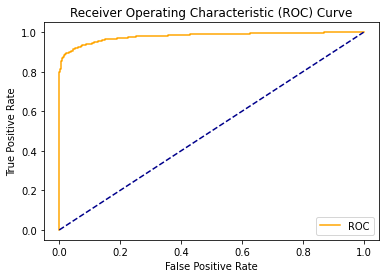

In [70]:
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = model.predict(X_test)
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)